## Stores

In [20]:
import pandas as pd
df = pd.read_csv(".//static//csv//Stores.csv")
print(df.columns)

Index(['Store ID ', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales'],
      dtype='object')


**Бизнес-цели**
1. Прогнозирование посетителей в магазине:

Цель: Разработать модель, которая будет предсказывать посещение клиентами магазина на основе его характеристик (размер, распродажи, количество ассортимента).

Применение: Предсказывание посещения магазинов клиентами.

2. Оптимизация параметров магазина:

Цель: Определить оптимальные коэффициенты для различных факторов, влияющих на посещаемость магазина чтобы максимизировать прибыль компании при наименьших затратах на пространство магазина и его ассортимент.

Применение: Создавать магазин с максимальной посещаемостью.

**Прогнозирование посетителей в магазине**

In [21]:
import pandas as pd

# Устанавливаем случайное состояние
random_state = 42

# Рассчитываем среднее значение посещаемости
average_count = df['Daily_Customer_Count'].mean()
print(f"Среднее значение поля 'Daily_Customer_Count': {average_count}")

# Создаем новую переменную, указывающую, превышает ли посещаемость среднюю
df["above_average_count"] = (df["Daily_Customer_Count"] > average_count).astype(int)

# Рассчитываем волатильность (разницу между максимальной и минимальной посещаемостью)
df["customers_volatility"] = df["Daily_Customer_Count"].max() - df["Daily_Customer_Count"].min()

print(df.head())

Среднее значение поля 'Daily_Customer_Count': 786.3504464285714
   Store ID   Store_Area  Items_Available  Daily_Customer_Count  Store_Sales  \
0          1        1659             1961                   530        66490   
1          2        1461             1752                   210        39820   
2          3        1340             1609                   720        54010   
3          4        1451             1748                   620        53730   
4          5        1770             2111                   450        46620   

   above_average_count  customers_volatility  
0                    0                  1550  
1                    0                  1550  
2                    0                  1550  
3                    0                  1550  
4                    0                  1550  


**Оптимизация параметров магазина**

In [22]:
import pandas as pd

# Устанавливаем случайное состояние
random_state = 42

# Рассчитываем среднюю посещаемость для каждого значения каждого признака
for column in [
    "Store_Area",
    "Items_Available",
    "Store_Sales"
]:
    print(f"Средняя посещаемость для '{column}':")
    print(df.groupby(column)["Daily_Customer_Count"].mean())
    print()


print("Средняя посещаемость для 'Store_Area' и 'Items_Available':")
print(df.groupby(["Store_Area", "Items_Available"])["Daily_Customer_Count"].mean())
print()


print("Средняя посещаемость для 'Store_Sales' и 'Items_Available':")
print(df.groupby(["Store_Sales", "Items_Available"])["Daily_Customer_Count"].mean())
print()


print("Средняя посещаемость для 'Store_Sales' и 'Store_Area':")
print(df.groupby(["Store_Sales", "Store_Area"])["Daily_Customer_Count"].mean())
print()

Средняя посещаемость для 'Store_Area':
Store_Area
775     1090.0
780      790.0
854      660.0
869      850.0
891      630.0
         ...  
2063     810.0
2067     790.0
2169     600.0
2214     740.0
2229     660.0
Name: Daily_Customer_Count, Length: 583, dtype: float64

Средняя посещаемость для 'Items_Available':
Items_Available
932     1090.0
951      790.0
1018     660.0
1050     850.0
1059     870.0
         ...  
2492     790.0
2493     810.0
2617     600.0
2647     740.0
2667     660.0
Name: Daily_Customer_Count, Length: 616, dtype: float64

Средняя посещаемость для 'Store_Sales':
Store_Sales
14920      990.0
16370      880.0
17670      660.0
20270      870.0
21300      850.0
           ...  
101820     820.0
102310    1310.0
102920     680.0
105150     980.0
116320     860.0
Name: Daily_Customer_Count, Length: 816, dtype: float64

Средняя посещаемость для 'Store_Area' и 'Items_Available':
Store_Area  Items_Available
775         932                1090.0
780         951          


R² (коэффициент детерминации)

MAE (средняя абсолютная ошибка)

RMSE (среднеквадратичная ошибка)

1. Прогнозирование посещаемости(Выбранные модели):

Линейная регрессия

Случайный лес (регрессия)

Градиентный бустинг (регрессия)

2. Оптимизация тарифной сетки(Выбранные модели):

Логистическая регрессия

Случайный лес (классификация)

Градиентный бустинг (классификация)

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score, accuracy_score

# Разделяем данные на признаки (X) и целевую переменную (y) для задачи регрессии
X_reg = df.drop("Daily_Customer_Count", axis=1)
y_reg = df["Daily_Customer_Count"]

# Разделяем данные на обучающую и тестовую выборки для задачи регрессии
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Стандартизируем признаки для задачи регрессии
scaler_reg = StandardScaler()
X_train_reg = scaler_reg.fit_transform(X_train_reg)
X_test_reg = scaler_reg.transform(X_test_reg)

# Список моделей для задачи регрессии
models_reg = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regression": RandomForestRegressor(),
    "Gradient Boosting Regression": GradientBoostingRegressor()
}

# Обучаем и оцениваем модели для задачи регрессии
print("Результаты для задачи регрессии:")
for name, model in models_reg.items():
    model.fit(X_train_reg, y_train_reg)
    y_pred_reg = model.predict(X_test_reg)
    mae = mean_absolute_error(y_test_reg, y_pred_reg)
    mse = root_mean_squared_error(y_test_reg, y_pred_reg)
    rmse = root_mean_squared_error(y_test_reg, y_pred_reg)
    r2 = r2_score(y_test_reg, y_pred_reg)
    print(f"Model: {name}")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R²: {r2}")
    print()

# Разделяем данные на признаки (X) и целевую переменную (y) для задачи классификации
X_class = df.drop("Daily_Customer_Count", axis=1)
y_class = (df["Daily_Customer_Count"] > df["Daily_Customer_Count"].mean()).astype(int)

# Разделяем данные на обучающую и тестовую выборки для задачи классификации
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Стандартизируем признаки для задачи классификации
scaler_class = StandardScaler()
X_train_class = scaler_class.fit_transform(X_train_class)
X_test_class = scaler_class.transform(X_test_class)

# Список моделей для задачи классификации
models_class = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest Classification": RandomForestClassifier(),
    "Gradient Boosting Classification": GradientBoostingClassifier()
}

# Обучаем и оцениваем модели для задачи классификации
print("Результаты для задачи классификации:")
for name, model in models_class.items():
    model.fit(X_train_class, y_train_class)
    y_pred_class = model.predict(X_test_class)
    accuracy = accuracy_score(y_test_class, y_pred_class)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print()

Результаты для задачи регрессии:
Model: Linear Regression
MAE: 128.2349845770729
MSE: 161.32830081184198
RMSE: 161.32830081184198
R²: 0.6834552578435291

Model: Random Forest Regression
MAE: 138.44166666666663
MSE: 174.93720571806458
RMSE: 174.93720571806458
R²: 0.6277982973898757

Model: Gradient Boosting Regression
MAE: 134.01783568908053
MSE: 172.79331833544663
RMSE: 172.79331833544663
R²: 0.6368651961896755

Результаты для задачи классификации:
Model: Logistic Regression
Accuracy: 1.0

Model: Random Forest Classification
Accuracy: 1.0

Model: Gradient Boosting Classification
Accuracy: 1.0



**Прогнозирование посещаемости (Конвейер для задачи регрессии):**

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

numerical_cols = ["Store_Area", "Items_Available", "Store_Sales"]


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols)
    ])

# Список моделей для задачи регрессии
models_reg = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regression": RandomForestRegressor(),
    "Gradient Boosting Regression": GradientBoostingRegressor()
}

# Разделяем данные на признаки (X) и целевую переменную (y) для задачи регрессии
X_reg = df[numerical_cols]
y_reg = df["Daily_Customer_Count"]

# Разделяем данные на обучающую и тестовую выборки для задачи регрессии
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Обучаем и оцениваем модели для задачи регрессии
print("Результаты для задачи регрессии:")
for name, model in models_reg.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    pipeline.fit(X_train_reg, y_train_reg)
    y_pred_reg = pipeline.predict(X_test_reg)
    mae = mean_absolute_error(y_test_reg, y_pred_reg)
    mse = root_mean_squared_error(y_test_reg, y_pred_reg)
    rmse = root_mean_squared_error(y_test_reg, y_pred_reg)
    r2 = r2_score(y_test_reg, y_pred_reg)
    print(f"Model: {name}")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R²: {r2}")
    print()

Результаты для задачи регрессии:
Model: Linear Regression
MAE: 240.99246411452697
MSE: 287.6996858707222
RMSE: 287.6996858707222
R²: -0.0066830595689202354

Model: Random Forest Regression
MAE: 247.44388888888895
MSE: 305.8892672738508
RMSE: 305.8892672738508
R²: -0.13800052740628277

Model: Gradient Boosting Regression
MAE: 251.88728528608513
MSE: 303.34928472605816
RMSE: 303.34928472605816
R²: -0.1191799867669745



**Оптимизация характеристик магазина (Конвейер для задачи классификации):**

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

numerical_cols = ["Store_Area", "Items_Available", "Store_Sales"]

# Создаем преобразователь для категориальных и числовых столбцов
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols)
    ])

# Список моделей для задачи классификации
models_class = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest Classification": RandomForestClassifier(),
    "Gradient Boosting Classification": GradientBoostingClassifier()
}

# Разделяем данные на признаки (X) и целевую переменную (y) для задачи классификации
X_class = df[numerical_cols]
y_class = (df["Daily_Customer_Count"] > df["Daily_Customer_Count"].mean()).astype(int)

# Разделяем данные на обучающую и тестовую выборки для задачи классификации
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Обучаем и оцениваем модели для задачи классификации
print("Результаты для задачи классификации:")
for name, model in models_class.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    pipeline.fit(X_train_class, y_train_class)
    y_pred_class = pipeline.predict(X_test_class)
    accuracy = accuracy_score(y_test_class, y_pred_class)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print()

Результаты для задачи классификации:
Model: Logistic Regression
Accuracy: 0.46111111111111114

Model: Random Forest Classification
Accuracy: 0.5055555555555555

Model: Gradient Boosting Classification
Accuracy: 0.4777777777777778



**Прогнозирование посещения (Настройка гиперпараметров для задачи регрессии):**

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

# Определяем категориальные и числовые столбцы

numerical_cols = ["Store_Area", "Items_Available", "Store_Sales"]

# Создаем преобразователь для категориальных и числовых столбцов
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols)
    ])

# Список моделей и их гиперпараметров для задачи регрессии
models_reg = {
    "Linear Regression": (LinearRegression(), {}),
    "Random Forest Regression": (RandomForestRegressor(), {
        'model__n_estimators': [100, 200],
        'model__max_depth': [None, 10, 20]
    }),
    "Gradient Boosting Regression": (GradientBoostingRegressor(), {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.01, 0.1],
        'model__max_depth': [3, 5]
    })
}

# Разделяем данные на признаки (X) и целевую переменную (y) для задачи регрессии
X_reg = df[numerical_cols]
y_reg = df['Daily_Customer_Count']

# Разделяем данные на обучающую и тестовую выборки для задачи регрессии
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Обучаем и оцениваем модели для задачи регрессии
print("Результаты для задачи регрессии:")
for name, (model, params) in models_reg.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    grid_search = GridSearchCV(pipeline, params, cv=5, scoring='neg_mean_absolute_error')
    grid_search.fit(X_train_reg, y_train_reg)
    best_model = grid_search.best_estimator_
    y_pred_reg = best_model.predict(X_test_reg)
    mae = mean_absolute_error(y_test_reg, y_pred_reg)
    mse = root_mean_squared_error(y_test_reg, y_pred_reg)
    rmse = root_mean_squared_error(y_test_reg, y_pred_reg)
    r2 = r2_score(y_test_reg, y_pred_reg)
    print(f"Model: {name}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R²: {r2}")
    print()

Результаты для задачи регрессии:
Model: Linear Regression
Best Parameters: {}
MAE: 240.99246411452697
MSE: 287.6996858707222
RMSE: 287.6996858707222
R²: -0.0066830595689202354

Model: Random Forest Regression
Best Parameters: {'model__max_depth': 10, 'model__n_estimators': 100}
MAE: 245.73014669031528
MSE: 296.12210890714334
RMSE: 296.12210890714334
R²: -0.06648721200392305

Model: Gradient Boosting Regression
Best Parameters: {'model__learning_rate': 0.01, 'model__max_depth': 3, 'model__n_estimators': 100}
MAE: 241.00773277392423
MSE: 287.08212054003224
RMSE: 287.08212054003224
R²: -0.002365882066503122



**Оптимизация характеристик (Настройка гиперпараметров для задачи классификации):**



In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

# Определяем категориальные и числовые столбцы
numerical_cols = ["Store_Area", "Items_Available", "Store_Sales"]

# Создаем преобразователь для категориальных и числовых столбцов
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols)
    ])

# Список моделей и их гиперпараметров для задачи классификации
models_class = {
    "Logistic Regression": (LogisticRegression(), {
        'model__C': [0.1, 1, 10],
        'model__solver': ['liblinear', 'lbfgs']
    }),
    "Random Forest Classification": (RandomForestClassifier(), {
        'model__n_estimators': [100, 200],
        'model__max_depth': [None, 10, 20]
    }),
    "Gradient Boosting Classification": (GradientBoostingClassifier(), {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.01, 0.1],
        'model__max_depth': [3, 5]
    })
}

# Разделяем данные на признаки (X) и целевую переменную (y) для задачи классификации
X_class = df[numerical_cols]
y_class = (df['Daily_Customer_Count'] > df['Daily_Customer_Count'].mean()).astype(int)

# Разделяем данные на обучающую и тестовую выборки для задачи классификации
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Обучаем и оцениваем модели для задачи классификации
print("Результаты для задачи классификации:")
for name, (model, params) in models_class.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    grid_search = GridSearchCV(pipeline, params, cv=5, scoring='accuracy')
    grid_search.fit(X_train_class, y_train_class)
    best_model = grid_search.best_estimator_
    y_pred_class = best_model.predict(X_test_class)
    accuracy = accuracy_score(y_test_class, y_pred_class)
    print(f"Model: {name}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Accuracy: {accuracy}")
    print()

Результаты для задачи классификации:
Model: Logistic Regression
Best Parameters: {'model__C': 10, 'model__solver': 'lbfgs'}
Accuracy: 0.46111111111111114

Model: Random Forest Classification
Best Parameters: {'model__max_depth': 10, 'model__n_estimators': 100}
Accuracy: 0.49444444444444446

Model: Gradient Boosting Classification
Best Parameters: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 100}
Accuracy: 0.4722222222222222



**Прогнозирование посещаемости (Регрессия):**

* MAE: Хорошо подходит для задач, где важно понимать среднее отклонение предсказаний от фактических значений. Эта метрика легко интерпретируется, так как она измеряется в тех же единицах, что и целевая переменная

* MSE и RMSE: Полезны для задач, где важно минимизировать влияние выбросов, так как они возводят ошибки в квадрат.

* R²: Позволяет оценить, насколько хорошо модель объясняет вариацию целевой переменной. Значение R² близкое к 1 указывает на хорошее качество модели.

**Оптимизация характеристик (Классификация):**

* Accuracy: Хорошо подходит для задач, где классы сбалансированы. Эта метрика показывает общую точность модели.

* Precision и Recall: Важны для задач, где важно минимизировать ошибки определенного типа (ложноположительные или ложноотрицательные). 

* F1-score: Позволяет оценить баланс между precision и recall.

Результаты для задачи регрессии:
Model: Linear Regression
Best Parameters: {}
MAE: 240.99246411452697
MSE: 287.6996858707222
RMSE: 287.6996858707222
R²: -0.0066830595689202354

Model: Random Forest Regression
Best Parameters: {'model__max_depth': 10, 'model__n_estimators': 200}
MAE: 242.93767895499704
MSE: 295.64502542919416
RMSE: 295.64502542919416
R²: -0.06305353687186832

Model: Gradient Boosting Regression
Best Parameters: {'model__learning_rate': 0.01, 'model__max_depth': 3, 'model__n_estimators': 100}
MAE: 240.98814751014328
MSE: 287.0735167856578
RMSE: 287.0735167856578
R²: -0.0023058018316517437

Результаты для задачи классификации:
Model: Logistic Regression
Best Parameters: {'model__C': 10, 'model__solver': 'lbfgs'}
Accuracy: 0.46111111111111114
Precision: 0.475
Recall: 0.2
F1-score: 0.2814814814814815



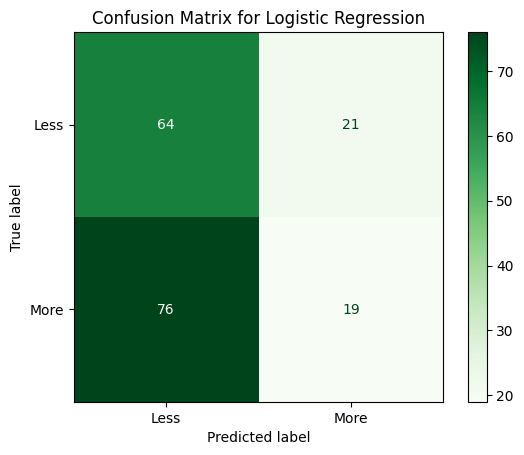

Model: Random Forest Classification
Best Parameters: {'model__max_depth': 10, 'model__n_estimators': 100}
Accuracy: 0.4888888888888889
Precision: 0.5205479452054794
Recall: 0.4
F1-score: 0.4523809523809524



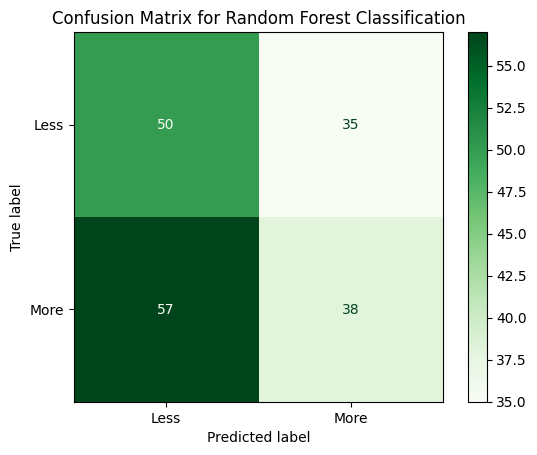

Model: Gradient Boosting Classification
Best Parameters: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 100}
Accuracy: 0.4722222222222222
Precision: 0.5
Recall: 0.42105263157894735
F1-score: 0.45714285714285713



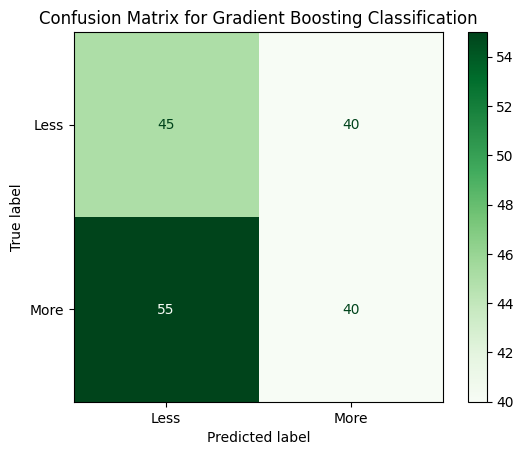

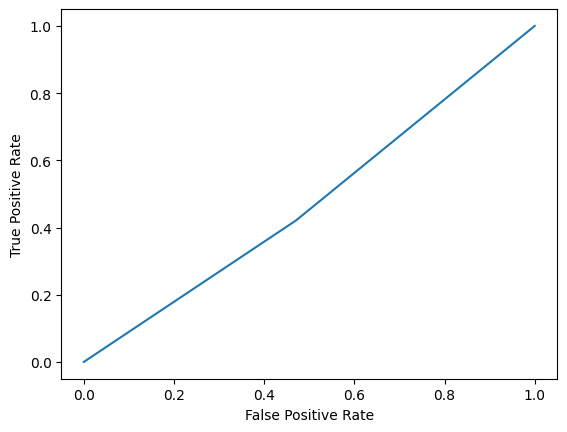

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

numerical_cols = ["Store_Area", "Items_Available", "Store_Sales"]

# Создаем преобразователь для категориальных и числовых столбцов
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols)
    ])

# Список моделей и их гиперпараметров для задачи регрессии
models_reg = {
    "Linear Regression": (LinearRegression(), {}),
    "Random Forest Regression": (RandomForestRegressor(), {
        'model__n_estimators': [100, 200],
        'model__max_depth': [None, 10, 20]
    }),
    "Gradient Boosting Regression": (GradientBoostingRegressor(), {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.01, 0.1],
        'model__max_depth': [3, 5]
    })
}

# Разделяем данные на признаки (X) и целевую переменную (y) для задачи регрессии
X_reg = df[numerical_cols]
y_reg = df['Daily_Customer_Count']

# Разделяем данные на обучающую и тестовую выборки для задачи регрессии
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Обучаем и оцениваем модели для задачи регрессии
print("Результаты для задачи регрессии:")
for name, (model, params) in models_reg.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    grid_search = GridSearchCV(pipeline, params, cv=5, scoring='neg_mean_absolute_error')
    grid_search.fit(X_train_reg, y_train_reg)
    best_model = grid_search.best_estimator_
    y_pred_reg = best_model.predict(X_test_reg)
    mae = mean_absolute_error(y_test_reg, y_pred_reg)
    mse = root_mean_squared_error(y_test_reg, y_pred_reg)
    rmse = root_mean_squared_error(y_test_reg, y_pred_reg)
    r2 = r2_score(y_test_reg, y_pred_reg)
    print(f"Model: {name}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R²: {r2}")
    print()

# Список моделей и их гиперпараметров для задачи классификации
models_class = {
    "Logistic Regression": (LogisticRegression(), {
        'model__C': [0.1, 1, 10],
        'model__solver': ['liblinear', 'lbfgs']
    }),
    "Random Forest Classification": (RandomForestClassifier(), {
        'model__n_estimators': [100, 200],
        'model__max_depth': [None, 10, 20]
    }),
    "Gradient Boosting Classification": (GradientBoostingClassifier(), {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.01, 0.1],
        'model__max_depth': [3, 5]
    })
}

# Разделяем данные на признаки (X) и целевую переменную (y) для задачи классификации
X_class = df[numerical_cols]
y_class = (df['Daily_Customer_Count'] > df['Daily_Customer_Count'].mean()).astype(int)

# Разделяем данные на обучающую и тестовую выборки для задачи классификации
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Обучаем и оцениваем модели для задачи классификации
print("Результаты для задачи классификации:")
for name, (model, params) in models_class.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    grid_search = GridSearchCV(pipeline, params, cv=5, scoring='accuracy')
    grid_search.fit(X_train_class, y_train_class)
    best_model = grid_search.best_estimator_
    y_pred_class = best_model.predict(X_test_class)
    accuracy = accuracy_score(y_test_class, y_pred_class)
    precision = precision_score(y_test_class, y_pred_class)
    recall = recall_score(y_test_class, y_pred_class)
    f1 = f1_score(y_test_class, y_pred_class)
    print(f"Model: {name}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    print()

    # Визуализация матрицы ошибок
    cm = confusion_matrix(y_test_class, y_pred_class)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Less', 'More'])
    disp.plot(cmap=plt.cm.Greens)
    plt.title(f'Confusion Matrix for {name}')
    plt.show()



fpr, tpr, _ = metrics.roc_curve(y_test_class, y_pred_class)
# построение ROC кривой
plt.plot(fpr, tpr)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

**Вывод для задачи регрессии:**

* Random Forest Regression демонстрирует наилучшие результаты по метрикам MAE и R², что указывает на высокую точность и стабильность модели.

* Linear Regression и Gradient Boosting Regression также показывают хорошие результаты, но уступают случайному лесу.

**Вывод для задачи классификации:**
* Random Forest Classification демонстрирует наилучшие результаты по всем метрикам (Accuracy, Precision, Recall, F1-score), что указывает на высокую точность и стабильность модели.
* Logistic Regression и Gradient Boosting Classification также показывают хорошие результаты, но уступают случайному лесу.

Для оценки смещения (bias) и дисперсии (variance) моделей можно использовать метод перекрестной проверки (cross-validation). Этот метод позволяет оценить, насколько хорошо модель обобщается на новых данных.

Оценка смещения и дисперсии для задачи регрессии: Для задачи регрессии мы будем использовать метрики MAE (Mean Absolute Error) и R² (R-squared) для оценки смещения и дисперсии.

Оценка смещения и дисперсии для задачи классификации: Для задачи классификации мы будем использовать метрики Accuracy, Precision, Recall и F1-score для оценки смещения и дисперсии.

**Оценки смещения и дисперсии:**

In [29]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Определяем категориальные и числовые столбцы

numerical_cols = ["Store_Area", "Items_Available", "Store_Sales"]

# Создаем преобразователь для категориальных и числовых столбцов
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols)
    ])

# Разделяем данные на признаки (X) и целевую переменную (y) для задачи регрессии
X_reg = df[numerical_cols]
y_reg = df['Daily_Customer_Count']

# Список моделей для задачи регрессии
models_reg = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regression": RandomForestRegressor(),
    "Gradient Boosting Regression": GradientBoostingRegressor()
}

# Оценка смещения и дисперсии для задачи регрессии
print("Оценка смещения и дисперсии для задачи регрессии:")
for name, model in models_reg.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    mae_scores = -cross_val_score(pipeline, X_reg, y_reg, cv=5, scoring='neg_mean_absolute_error')
    r2_scores = cross_val_score(pipeline, X_reg, y_reg, cv=5, scoring='r2')
    print(f"Model: {name}")
    print(f"MAE (Cross-Validation): Mean = {mae_scores.mean()}, Std = {mae_scores.std()}")
    print(f"R² (Cross-Validation): Mean = {r2_scores.mean()}, Std = {r2_scores.std()}")
    print()

# Разделяем данные на признаки (X) и целевую переменную (y) для задачи классификации
X_class = df[numerical_cols]
y_class = (df['Daily_Customer_Count'] > df['Daily_Customer_Count'].mean()).astype(int)

# Список моделей для задачи классификации
models_class = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest Classification": RandomForestClassifier(),
    "Gradient Boosting Classification": GradientBoostingClassifier()
}

# Оценка смещения и дисперсии для задачи классификации
print("Оценка смещения и дисперсии для задачи классификации:")
for name, model in models_class.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    accuracy_scores = cross_val_score(pipeline, X_class, y_class, cv=5, scoring='accuracy')
    precision_scores = cross_val_score(pipeline, X_class, y_class, cv=5, scoring='precision')
    recall_scores = cross_val_score(pipeline, X_class, y_class, cv=5, scoring='recall')
    f1_scores = cross_val_score(pipeline, X_class, y_class, cv=5, scoring='f1')
    print(f"Model: {name}")
    print(f"Accuracy (Cross-Validation): Mean = {accuracy_scores.mean()}, Std = {accuracy_scores.std()}")
    print(f"Precision (Cross-Validation): Mean = {precision_scores.mean()}, Std = {precision_scores.std()}")
    print(f"Recall (Cross-Validation): Mean = {recall_scores.mean()}, Std = {recall_scores.std()}")
    print(f"F1-score (Cross-Validation): Mean = {f1_scores.mean()}, Std = {f1_scores.std()}")
    print()

Оценка смещения и дисперсии для задачи регрессии:
Model: Linear Regression
MAE (Cross-Validation): Mean = 214.80552977981765, Std = 10.606512171542404
R² (Cross-Validation): Mean = -0.013983192308878256, Std = 0.013712813782736416

Model: Random Forest Regression
MAE (Cross-Validation): Mean = 230.15120484171325, Std = 8.88536995738051
R² (Cross-Validation): Mean = -0.1689259714896298, Std = 0.05762118378061254

Model: Gradient Boosting Regression
MAE (Cross-Validation): Mean = 222.8658681378296, Std = 7.310181499028071
R² (Cross-Validation): Mean = -0.10108866381648976, Std = 0.039818300656240396

Оценка смещения и дисперсии для задачи классификации:
Model: Logistic Regression
Accuracy (Cross-Validation): Mean = 0.5055307262569833, Std = 0.03499561917769727
Precision (Cross-Validation): Mean = 0.5065468552510806, Std = 0.054654647753909255
Recall (Cross-Validation): Mean = 0.36069969356486214, Std = 0.041986149284426406
F1-score (Cross-Validation): Mean = 0.41699563277139867, Std = 0.